<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Машинное обучение

### Лекция 2. Линейные методы классификации и регрессии: метод стохастического градиента

<br />
<br />
10 сентября 2021

### Пятиминутка

1. Что такое машинное обучение?
2. Как называют признаки объектов в зависимости от множества их значений?
3. Как определить, что модель переобучилась?


### Обучение регрессии — это оптимизация

Обучающая выборка: $X^\ell = (x_i, y_i)^\ell_{i=1}$, $x_i \in \mathbb{R}^n$,  $y_i \in \mathbb{R}$.

**Модель линейной регрессии** (веса $w \in \mathbb{R}^n$):

$a(x, w) = \left<w, x\right> = w^T x= \sum\limits_{j=1}^n w_jf_j(x)$

**Квадратичная функция потерь**:

$\mathcal{L} (a, y) = (a - y)^2$

**Метод обучения — метод наименьших квадратов**:

$Q(w) = \frac1\ell\sum\limits_{i=1}^\ell (a(x_i, w) - y_i)^2 \to \min\limits_w$

**Проверка по тестовой выборке** $X^k = (\tilde{x}_i, \tilde{y}_i)_{i=1}^k$

$\overline{Q}(w) = \frac1k\sum\limits_{i=1}^k (a(\tilde{x}_i, w) - \tilde{y}_i)^2$


### Обучение классификации — тоже оптимизация

Обучающая выборка: $X^\ell = (x_i, y_i)^\ell_{i=1}$, $x_i \in \mathbb{R}^n$,  $\color{red}{y_i \in \{-1, +1\}}$.

**Модель классификации — линейная** (веса $w \in \mathbb{R}^n$):

$a(x, w) = \color{red}{sign}\left<w, x\right> = \color{red}{sign}(\sum\limits_{j=1}^n w_jf_j(x))$

**Функция потерь — бинарная или её аппроксимация**:

$\mathcal{L} (a, y) = \color{red}{[ay < 0] = [\left<w, x\right> y < 0] \leq \overline{\mathcal{L}}(\left<w, x\right>, y)}$

**Метод обучения — минимизация эмпирического риска**:

$Q(w) = \color{red}{\frac1\ell\sum\limits_{i=1}^\ell [\left<w, x_i\right> y_i < 0] \leq \frac1\ell\sum\limits_{i=1}^\ell \overline{\mathcal{L}} (\left<w, x_i\right>, y_i) \to \min_w}$

**Проверка по тестовой выборке** $X^k = (\tilde{x}_i, \tilde{y}_i)_{i=1}^k$

$\overline{Q}(w) = \frac1k\sum\limits_{i=1}^k \color{red}{[\left<\tilde{x}_i, w\right> \tilde{y}_i < 0]}$


### Понятие отступа для разделяющих классификаторов

Разделяющий классификатор:

$a(x, w) = sign\ g(x, w)$

$g(x, w)$ — разделяющая (дискриминантная) функция, $g(x, w) = 0$ — уравнение разделяющей поверхности

$\color{red}{M_i(w) = g(x_i, w)y_i}$ — отступ (margin) объекта $x_i$

$M_i(w) \leq 0 \iff $ алгоритм $a(x, w)$ ошибается на $x_i$

<div align="center">
    <img src="images/margins.jpg" alt="margins" width=1000 />
Ранжирование объектов по возрастанию отступов $M_i(w)$
</div>


### Непрерывные аппроксимации пороговой функции потерь $\mathcal{L}(M)$

$V(M) = (1 − M)_+$ — кусочно-линейная (SVM)

$H(M) = (−M)_+$ — кусочно-линейная (Hebb's rule)

$L(M)=\log_2(1 + \exp(-M))$ — логарифмическая (LR)

$Q(M)=(1 − M)^2$ — квадратичная (FLD)

$S(M)=2(1+\exp(M))^{-1}$ — сигмоидная (ANN)

$E(M)= \exp(-M)$ – экспоненциальная (AdaBoost)

$\color{red}{[M<0]}$ — пороговая функция потерь


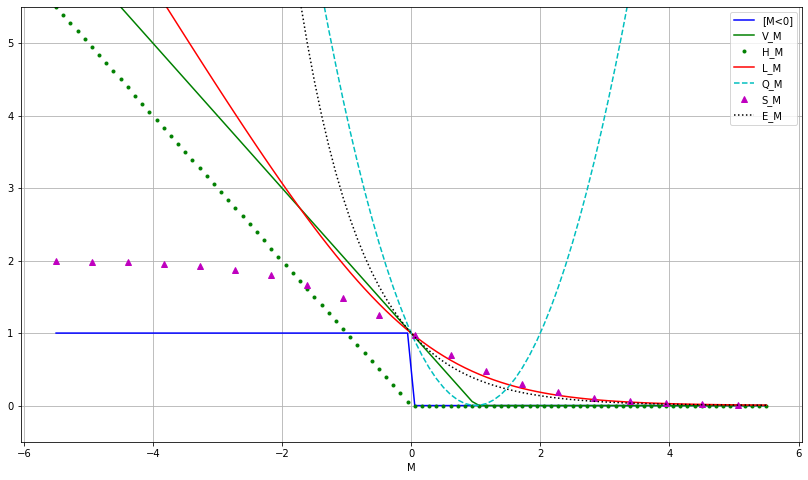

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('M')
x = np.linspace(-5.5, 5.5, num=100)
acc_loss = x < 0
V_M = (1 - x) * ((1 - x) > 0)
H_M = acc_loss * (-x)
L_M = np.log2(1 + np.exp(-x))
Q_M = (1 - x)**2
S_M = 2 * (1 + np.exp(x))**(-1)
E_M = np.exp(-x)

ax.plot(x, acc_loss, 'b', label='[M<0]')
ax.plot(x, V_M, 'g', label='V_M')
ax.plot(x, H_M, '.g', label='H_M')
ax.plot(x, L_M, 'r', label='L_M')
ax.plot(x, Q_M, '--c', label='Q_M')
ax.plot(x[::5], S_M[::5], '^m', label='S_M')
ax.plot(x, E_M, 'k:', label='E_M')

ax.set_ylim(-0.5, 5.5)
ax.grid(True)
fig.set_size_inches(14, 8)
plt.legend(loc='best')
plt.show()

### Линейный классификатор — математическая модель нейрона

Линейная модель нейрона МакКаллока-Питтса, 1943 год

$a(x, w) = \sigma(\left<w, x\right>) = \sigma\left(\sum\limits_{j=1}^n w_j f_j(x) - w_0 \right)$

 * $\sigma(z)$ — функция активации (например, sign)
 * $w_j$ − весовые коэффициенты синаптических связей
 * $w_0$ — порог активации
 * $w, x \in \mathbb{R}^{n+1}$ — если ввести константный признак $f_0(x) \equiv -1$

<div align="center">
    <img src="images/440px-Artificial_Neuron_Scheme.png" alt="ans" width=600 />
</div>

<div align="center">
    <img src="images/460px-Neuron-rus.svg.png" alt="nueron_ru" width=1000 />
</div>

### Градиентный метод численной минимизации

Минимизация эмпирического риска (регрессия, классификация):
$Q(w) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \mathcal{L}_i(w) \to \min\limits_w$

Численная минимизация методом __градиентного спуска__:

$w^{(0)} = $ начальное приближение

$w^{(t+1)} = w^{(t)} - h * \nabla_w Q(w^{(t)})$

$\nabla_w Q(w) = \left(\frac{\partial Q(w)}{\partial w_j} \right)^n_{j=0}$

где $h$ — градиентный шаг, называемый также темпом обучения (learning rate)

$w^{(t+1)} = w^{(t)} - h \sum\limits_{i=1}^\ell \nabla_w \mathcal{L}_i(w^{(t)})$

**Идея ускорения сходимости**:
брать $(x_i, y_i)$ по одному и сразу обновлять вектор весов — стохастический градиентный спуск.


### Визуализация градиентного метода

<div align="center">
  <img src="images/gradient-trajectory.png" alt="gradient" width=1000 />
    Две возможные траектории градиентного спуска. 
    В варианте (а) у целевой функции «хорошее поведение», что позволяет точке по градиенту плавно перемещаться к оптимуму. 
    В варианте (b) градиент начинает колебаться по мере того, как он падает в узкую долину, тем самым сходясь медленнее.
</div>



### Стохастический градиентный спуск (stochastic gradient descent)

**Вход**: выборка $X^\ell$, темп обучения $h$, темп забывания $\lambda$

**Выход**: вектор весов $w$

1 инициализировать веса $w_j,\ j = 0, \dots, n$

2 инициализировать оценку функционала: $\overline{Q} = \frac1\ell \sum\limits_{i=1}^\ell \mathcal{L}_i(w)$

3 **повторять**

$\ \ \ $ 4 выбрать объект $x_i$ из $X^\ell$ случайным образом

$\ \ \ $ 5 вычислить потерю: $\varepsilon_i = \mathcal{L}_i(w)$

$\ \ \ $ 6 сделать градиентный шаг: $w = w - h \nabla_w \mathcal{L}_i(w)$

$\ \ \ $ 7 оценить функционал: $\overline{Q} = \lambda \varepsilon_i + (1 - \lambda) \overline{Q}$
    
8 **пока** значение $\overline{Q}$ и/или веса $w$ не сойдутся

----
_Robbins, H., Monro S._ A stochastic approximation method // Annals of Mathematical Statistics, 1951, 22 (3), p. 400—407.


<div class="alert alert-info">
<b>Вопрос 1:</b> Откуда взялась рекуррентная оценка функционала ошибки?
</div>
$\overline{Q} := \lambda \varepsilon_i + (1 - \lambda) \overline{Q}$

### Рекуррентная оценка функционала ошибки

**Проблема**: вычисление оценки $Q$ по всей выборке $x_1, \dots, x_\ell$ намного дольше градиентного шага по одному объекту $x_i$

**Решение**: использовать приближённую рекуррентную формулу. Среднее арифметическое:

$\overline{Q}_m = \frac1m \varepsilon_m + \frac1m \varepsilon_{m-1} + \frac1m \varepsilon_{m-2} + \dots$

$\overline{Q}_m = \color{red}{\frac1m} \varepsilon_m + \color{red}{\left(1 - \frac1m\right)} \overline{Q}_{m-1}$

Экспоненциальное скользящее среднее:
$\overline{Q}_m = \lambda \varepsilon_m + \left(1 - \lambda\right)\lambda\varepsilon_{m-1} + \left(1 - \lambda\right)^2\lambda\varepsilon_{m-2} + \dots$

$\overline{Q}_m = \color{red}{\lambda} \varepsilon_m + \color{red}{\left(1 - \lambda\right)} \overline{Q}_{m-1}$

Параметр $\lambda$ — темп забывания предыстории ряда


### Алгоритм SAG (Stochastic Average Gradient)

**Вход**: выборка $X^\ell$, темп обучения $h$, темп забывания $\lambda$

**Выход**: вектор весов $w$

1 инициализировать веса $w_j,\ j = 0, \dots, n$

2 $\color{red}{\text{инициализировать градиенты:} G_i = \nabla \mathcal{L}_i(w), i = 1, \dots, \ell}$

3 инициализировать оценку функционала: $\overline{Q} = \frac1\ell \sum\limits_{i=1}^\ell \mathcal{L}_i(w)$

4 **повторять**

$\ \ \ $ 5 выбрать объект $x_i$ из $X^\ell$ случайным образом

$\ \ \ $ 6 вычислить потерю: $\varepsilon_i = \mathcal{L}_i(w)$

$\ \ \ $ 7 $\color{red}{\text{вычислить градиент: } G_i = \nabla \mathcal{L}_i(w)}$

$\ \ \ $ 8 сделать градиентный шаг: $w := w - h \color{red}{\frac1\ell \sum_{i=1}^\ell G_i}$

$\ \ \ $ 9 оценить функционал: $\overline{Q} = \lambda \varepsilon_i + (1 - \lambda) \overline{Q}$
    
10 пока значение $\overline{Q}$ и/или веса $w$ не сойдутся

----
_Schmidt M., Le Roux N., Bach F._ Minimizing finite sums with the stochastic average gradient // arXiv.org, 2013.

### Варианты инициализации весов

1. $w_j = 0$ для всех $j = 0, \dots, n$

2. небольшие случайные значения:

$$w_j = \text{random}(- \frac{1}{2n}, \frac{1}{2n})$$

3. $w_j = \frac{\left<y, f_j \right>}{\left<f_j, f_j \right>}$, где $f_j = (f_j(x_i))_{i=1}^\ell$ — вектор значений признака

Эта оценка $w$ оптимальна, если
1) функция потерь квадратична и
2) признаки некоррелированы, $\left<f_j, f_k \right> = 0, j \neq k$ 

4. обучение по небольшой случайной подвыборке объектов

5. мультистарт: многократные запуски из разных случайных начальных приближений и выбор лучшего решения

### Варианты порядка предъявления объектов

1. перетасовка объектов (shuffling): попеременно брать объекты из разных классов

2. чаще брать объекты, на которых ошибка больше: чем меньше $M_i$, тем больше вероятность взять объект

3. чаще брать объекты, на которых уверенность меньше: чем меньше $|M_i|$, тем больше вероятность взять объект

4. вообще не брать «хорошие» объекты, у которых $M_i > \mu_+$ (при этом немного ускоряется сходимость)

5. вообще не брать объекты-«выбросы», у которых $M_i < \mu_-$ (при этом может улучшиться качество классификации)

Параметры $\mu_+, \mu_-$ придётся подбирать.


### Варианты выбора градиентного шага

1. сходимость гарантируется (для выпуклых функций) при

$h_t \to 0, \sum\limits_{t=1}^{\infty} h_t = \infty, \sum\limits_{t=1}^{\infty} h_t^2 < \infty,$

в частности можно положить $h_t = 1/t$

2. метод скорейшего градиентного спуска:

$\mathcal{L}_i(w - h\nabla \mathcal{L}_i(w)) \to \min\limits_h$

позволяет найти адаптивный шаг $h^*$; при квадратичной функции потерь $h^* = \|x_i\|^{-2}$

3. пробные случайные шаги для «выбивания» итерационного процесса из локальных минимумов

4. метод Левенберга-Марквaрдта (второго порядка)

### Диагональный метод Левенберга-Марквардта

Метод Ньютона-Рафсона, $\mathcal{L}_i(w) \equiv \mathcal{L}(\left<w, x_i\right>y_i)$:

$w = w - h(\mathcal{L}_i^{\prime\prime}(w))^{-1} \nabla \mathcal{L}_i(w)$,

где $\mathcal{L}_i^{\prime\prime}(w) = \left( \frac{\partial^2\mathcal{L}_i(w)}{\partial w_j \partial w_k} \right)$ — гессиан, $n\times n$-матрица

**Эвристика**. Считаем, что гессиан диагонален:

$w_j = w_j - h\left(\frac{\partial^2\mathcal{L}_i(w)}{\partial w_j^2} + \mu\right)^{-1} \frac{\partial \mathcal{L}_i(w)}{\partial w_j} $,

$h$ — темп обучения, можно полагать $h = 1$

$\mu$ — параметр, предотвращающий обнуление знаменателя

Отношение $h/\mu$ есть темп обучения на ровных участках функционала $\mathcal{L}_i(w)$, где вторая производная обнуляется.

### Проблема переобучения

**Возможные причины переобучения**:
 * слишком мало объектов; слишком много признаков;
 * линейная зависимость (мультиколлинеарность) признаков:
   - пусть построен классификатор: $a(x, w) = sign \left<w, х\right>$;
   - мультиколлинеарность: $\exists u \in \mathbb{R}^{n+1}: \forall x_i \in X^\ell \left<u, х_i\right> = 0$;
   - неединственность решения: $\forall \gamma \in \mathbb{R}\ a(x, w) = sign \left<w + \gamma u, х\right>$.

**Проявления переобучения**:
 * слишком большие веса $|w_j|$ разных знаков
 * неустойчивость дискриминантной функции $\left<w, х\right>$
 * $Q(X^\ell) \lt\lt Q(X^k)$
 
 
**Основной способ уменьшить переобучение**:
 * регуляризация (сокращение весов, weight decay)


<div class="alert alert-info">
<b>Вопрос 2:</b> Как заставить модель уменьшать веса?
</div>

### Регуляризация (сокращение весов)

Штраф за увеличение нормы вектора весов:

$ \mathcal{\tilde L}_i(w) = \mathcal{L}_i(w) + \frac{\tau}{2} \|w\|^2 = \mathcal{L}_i(w) + 
\frac{\tau}{2}\sum\limits_{j=1}^n w_j^2  \to \min\limits_w $

Градиент: $\nabla \mathcal{\tilde L}_i(w) = \mathcal{\tilde L}_i(w) + \tau w$


Модификация градиентного шага:

$w = w\color{red}{(1 - h\tau)} - h \nabla \mathcal{L}_i(w)$

Методы подбора коэффициента регуляризации $\tau$:
 * скользящий контроль
 * стохастическая адаптация
 * двухуровневый бaйесовский вывод

###  SG: достоинства и недостатки

**Достоинства**:
 * легко реализуется
 * легко обобщается на любые $g(x, w), \mathcal{L}(a, y)$
 * легко добавить регуляризацию
 * возможно динамическое (потоковое) обучение
 * на сверхбольших выборках можно получить неплохое решение, даже не обработав все $x_i, y_i$
 * подходит для задач с большими данными
 
**Недостатки**:
 * подбор комплекса эвристик является искусством (не забыть про переобучение, застревание, расходимость)

### Принцип максимума правдоподобия

Пусть $X \times Y$ — вероятностное пространство, модель (т.е. её параметры $w$) тоже генерируются некоторым вероятностным распределением.

Формула Байеса

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

$A \equiv w$,            $B \equiv Y, X$

$P(w|Y, X) = \frac{P(Y, X|w)P(w)}{P(Y, X)} = \frac{P(Y | X, w)P(X|w)P(w)}{P(Y | X)P(X)}  \\
P(w|Y, X) = \frac{P(Y|w, X)P(w)}{P(Y | X)}$

Здесь

$P(w|Y, X)$ — апостериорное распределение параметров

$P(w)$ — априорное распределение параметров

$P(Y|X, w)$ — правдоподобие


$\arg\max\limits_w P(w|X, Y) = \arg\max\limits_w {P(Y|w, X)P(w)} \color{red}{=} \arg\max\limits_w \prod\limits_{i=1}^\ell {P(y_i|w, x_i)P(w)} = \\ \arg\max\limits_w \sum\limits_{i=1}^l \log P(y_i|w, x_i) + \log P(w)$


### Связь правдоподобия и аппроксимации эмпирического риска

 * Максимизация правдоподобия (maximum likelihood)

$L(w) = \sum\limits_{i=1}^\ell \color{red}{\log P(y_i|w, x_i)} \to \max\limits_w$

 * Минимизация аппроксимированного эмпирического риска

$Q(w) = \sum\limits_{i=1}^\ell \color{red}{\mathcal{L}(y_i, x_i, w)} \to \min\limits_w$

 * Эти два принципа эквивалентны, если положить
 
$ -\log P(y_i|w, x_i) =  \mathcal{L}(y_i, x_i, w)$

Модель $P(y|x,w) \equiv $ Модель $g(x,w)$ и $\mathcal{L}(M)$

### Резюме

 * Метод стохастического градиента (SG, SAG) подходит для любых моделей и функций потерь
 * Хорошо подходит для обучения по большим данным
 * Аппроксимация пороговой функции потерь $\mathcal{L}(M)$ позволяет использовать градиентную оптимизацию
 * Функции $\mathcal{L}(M)$, штрафующие за приближение к границе классов, увеличивают зазор между классами, благодаря этому повышается надёжность классификации
 * Регуляризация решает проблему мультиколлинеарности и также снижает переобучение 